Analyzing saved lyrics by NOTING (not counting) the occurences of words or topics within songs within artists withing genres

eg. if 'Are you that somebody' by Aaliyah includes words about love or just 'baby', add a column for each song that will count the occurences and/or a column just marking whether the occurence happened (which is basically >0)

then use the count / occurence and plot it's relation with the writer / producer / featured counts and year etc

In [1]:
import pandas as pd
import re
import os
import plotly
import plotly.express as px

import plotly.graph_objects as graph_objects
from plotly.subplots import make_subplots

In [2]:
genre = 'pop'

df_path = f'dataframes/with_counts/{genre}_count.csv'

df = pd.read_csv(df_path, index_col=0)

In [3]:
df.head()

,Artist,Song Title,Full Title,Release Date,Year,Month,Day,Pageviews,url,featured_count,producer_count,writer_count,Song Lyrics,Artist Image,love,money,violence,drugs,gendered
0,Aaliyah,Are You That Somebody?,Are You That Somebody? by Aaliyah (Ft. Timbaland),1998-05-26,1998.0,5.0,26.0,373960,https://genius.com/Aaliyah-are-you-that-somebo...,1,1,2,dirty south can y'all really feel me east coas...,https://images.genius.com/3fea34947a97beb226fc...,3,0,2,0,28
1,Aaliyah,Enough Said,Enough Said by Aaliyah (Ft. Drake),2012-08-05,2012.0,8.0,5.0,316333,https://genius.com/Aaliyah-enough-said-lyrics,1,1,3,64 contributorsenough said lyrics uh 'cause i ...,https://images.genius.com/3fea34947a97beb226fc...,7,0,0,0,27
2,Aaliyah,At Your Best (You Are Love),At Your Best (You Are Love) by Aaliyah,1994-08-22,1994.0,8.0,22.0,285549,https://genius.com/Aaliyah-at-your-best-you-ar...,0,1,6,57 contributorsat your best you are love lyric...,https://images.genius.com/3fea34947a97beb226fc...,6,0,0,0,17
3,Aaliyah,Miss You,Miss You by Aaliyah,2002-11-16,2002.0,11.0,16.0,245608,https://genius.com/Aaliyah-miss-you-lyrics,0,1,3,36 contributorsmiss you lyrics oh hey yeahyeah...,https://images.genius.com/3fea34947a97beb226fc...,13,0,1,0,28
4,Aaliyah,Age Ain’t Nothing But a Number,Age Ain't Nothing But a Number by Aaliyah,1994-12-06,1994.0,12.0,6.0,207419,https://genius.com/Aaliyah-age-aint-nothing-bu...,0,1,1,54 contributorsage ain’t nothing but a number ...,https://images.genius.com/3fea34947a97beb226fc...,3,0,0,0,14


In [4]:
aaliyah_df = df[df['Artist'] == 'Aaliyah']

In [6]:
len(aaliyah_df)

20

In [15]:
set(df['Artist'])

{'Aaliyah',
 'Beyoncé',
 'Britney Spears',
 'Carly Rae Jepsen',
 'Charli XCX',
 'Dua Lipa',
 'Madonna',
 'Michael Jackson',
 'Olivia Rodrigo',
 'Taylor Swift'}

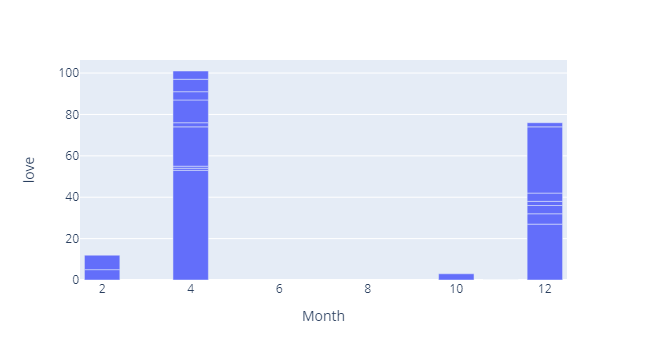

In [17]:
love_bar = px.bar(df[df['Artist'] == 'Beyoncé'], x='Month', y='love')
love_bar.show()

### try to get some correlations

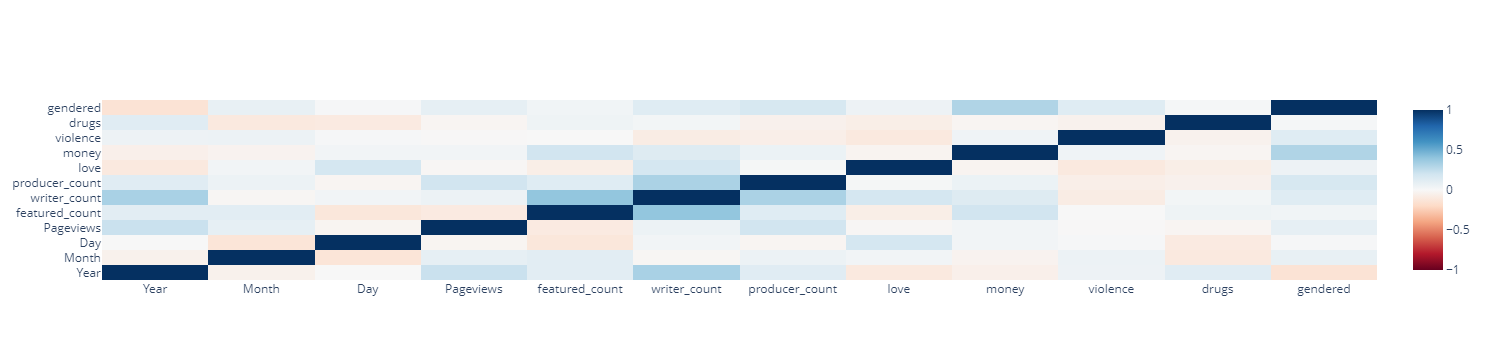

In [24]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

pio.templates.default = "plotly_white"

to_corr = ['Year', 'Month', 'Day', 'Pageviews', 'featured_count', 'writer_count',
          'producer_count', 'love', 'money', 'violence', 'drugs', 'gendered']

corr = df[to_corr].corr()

corr_map = go.Heatmap(
    z = corr,
    x=corr.columns,
    y=corr.columns,
    colorscale=px.colors.diverging.RdBu,
    zmin=-1,
    zmax=1
)

fig = go.Figure()
fig.add_trace(corr_map)
fig.show()